<a href="https://colab.research.google.com/github/ruben216/realidadepublica/blob/main/Report_RP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Primeira extração: Emendas parlamentares
Antes de executar o código abaixo, é necessário possuir uma chave gerada no portal de transparência. Detalhes no Readme do repositório.


In [ ]:
import pandas as pd
import requests
import json
import numpy as np
from google.colab import data_table
data_table.enable_dataframe_formatter()
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# A biblioteca do Google Drive só é necessária para o caso de se exportar o dataframe.
#from google.colab import drive

#Comando para "criar" ou importar o seu Google Drive para dentro do Colab
#drive.mount('/drive')

In [ ]:
# Chave gerada no portal
chave_portal = '6f98dcedb14a7c1053bc2bd8fb56ba5f'

# É necessário enviar a chave no Header da requisição
header_chave = {'chave-api-dados':chave_portal}

#Variavel que indica se tivemos conteúdo retornado do Portal
dados_pagina = "dados"

#Variável que controla a página que estamos iterando
pagina = 1

#Ano que iremos consultar
ano = 2021

#Objeto do tipo lista que irá armazenar os dados retornados de todas as páginas
dados_completos = []

# Laço que valida se o conteúdo retornado não está vazio.
while(dados_pagina):

  # A URL é montada informando o ano e a página
  url = f'http://api.portaldatransparencia.gov.br/api-de-dados/emendas?ano={ano}&pagina={pagina}'
  
  # Neste ponto é enviada a request ao Portal de Transparencia, informando a URL e a chave.
  dados_pagina = requests.get(url, verify=True,headers=header_chave).json()
    
  # Caso tenha conteúdo no retorno, ele é adicionado ao objeto de dados_completos
  if(dados_pagina):
    dados_completos = dados_completos + dados_pagina
  pagina += 1
  
  #print(pagina)


df_dados_completos = pd.DataFrame(dados_completos)


In [ ]:
#Caso queira visualizar os primeiros 5 registros, pode usar o head abaixo
df_dados_completos.head()

,codigoEmenda,ano,autor,nomeAutor,numeroEmenda,localidadeDoGasto,funcao,subfuncao,valorEmpenhado,valorLiquidado,valorPago,valorRestoInscrito,valorRestoCancelado,valorRestoPago,valorRestoAPagar
0,202019970023,2021,VICENTINHO,VICENTINHO,0023,SÃO PAULO,Educação,Ensino superior,"0,00","0,00","0,00","100.000,00","0,00","0,00","100.000,00"
1,202039890004,2021,FRANCISCO JR.,FRANCISCO JR.,0004,GOIÁS,Educação,Ensino superior,"0,00","0,00","0,00","500.000,00","0,00","0,00","500.000,00"
2,202120380004,2021,FLAVIO ARNS,FLAVIO ARNS,0004,PARANÁ,Direitos da cidadania,"Direitos individuais, coletivos e difusos","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,202038930004,2021,MARCIO JERRY,MARCIO JERRY,0004,COLINAS,Educação,Ensino superior,"0,00","0,00","0,00","300.000,00","0,00","0,00","300.000,00"
4,202141360007,2021,IZALCI LUCAS,IZALCI LUCAS,0007,DISTRITO FEDERAL,Direitos da cidadania,"Direitos individuais, coletivos e difusos","0,00","0,00","0,00","0,00","0,00","0,00","0,00"


In [ ]:
# Para exportar o dataframe para o Google Drive
df_dados_completos.to_csv('/drive/MyDrive/Colab Notebooks/df_dados_completos.csv')

### Agrupando os dados por Estado

In [ ]:

#df_dados_completos[df_dados_completos['localidadeDoGasto']=='SERGIPE']
df_dados_completos.groupby('localidadeDoGasto').count()['funcao'].sort_values(ascending=False).head(10)



localidadeDoGasto
SÃO PAULO            542
MINAS GERAIS         397
RIO DE JANEIRO       326
Nacional             292
RIO GRANDE DO SUL    287
BAHIA                221
PARANÁ               203
PERNAMBUCO           175
GOIÁS                154
SANTA CATARINA       145
Name: funcao, dtype: int64

### Agrupando os dados por parlamentar

In [ ]:
df_dados_completos.groupby('autor').count()['funcao']
  .sort_values(ascending=False)
  .head(10)

autor
RELATOR GERAL            34
OTTO ALENCAR             30
MARRECA FILHO            29
JUAREZ COSTA             27
MAURO BENEVIDES FILHO    26
JULIO CESAR              24
PROFESSORA MARCIVANIA    23
LUCAS REDECKER           23
ELI CORREA FILHO         22
ALAN RICK                22
Name: funcao, dtype: int64

### Clusterização com dendogramas

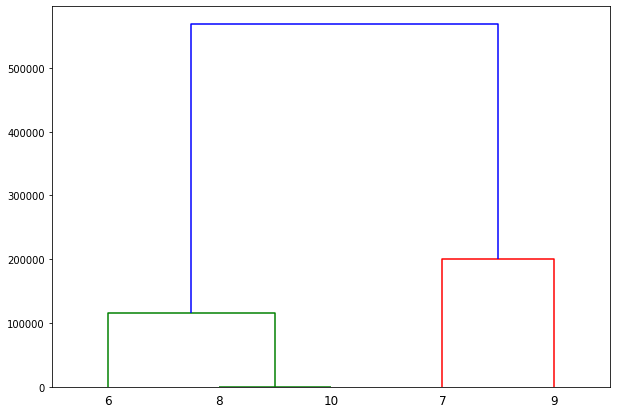

In [ ]:
# Nesse exemplo, primeiro eu criei um subset do dataframe inicial
dados_resumo = df_dados_completos.head()

# Agora nós criamos outro subset, trazendo todas as linhas, porém somente 2 colunas
dados_loc = dados_resumo.loc[:,["valorRestoPago","valorRestoAPagar"]]

# Realizamos algumas limpezas nos dados, para conseguir gerar o dendograma
dados_loc["valorRestoAPagar"] = dados_loc["valorRestoAPagar"].str.replace(' ', '')
dados_loc["valorRestoAPagar"] = dados_loc["valorRestoAPagar"].str.replace('.', '')
dados_loc["valorRestoAPagar"] = dados_loc["valorRestoAPagar"].str.replace(',', '.')
dados_loc["valorRestoAPagar"] = pd.to_numeric(dados_loc["valorRestoAPagar"], downcast="float")

dados_loc["valorRestoPago"] = dados_loc["valorRestoPago"].str.replace(' ', '')
dados_loc["valorRestoPago"] = dados_loc["valorRestoPago"].str.replace('.', '')
dados_loc["valorRestoPago"] = dados_loc["valorRestoPago"].str.replace(',', '.')
dados_loc["valorRestoPago"] = pd.to_numeric(dados_loc["valorRestoPago"], downcast="float")

# Neste ponto é criada a matriz de distância dos grupos, utilizando o método single.
# Este método pode ser entendido como o "método do vizinho mais próximo"
linked = linkage(dados_loc, 'ward')
#linked


labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

